# **Redes Neurais e CNN: Identificação de Objetos**

Neste trabalho iremos fazer a identificação de um conjunto de dados de imagens de artigos de Zalando chamado Fashion-MNIST, que consiste em um conjunto de treinamento de 60.000 exemplos e um conjunto de teste de 10.000 exemplos. Cada exemplo é uma imagem em tons de cinza 28x28, associada a um rótulo de 10 classes.

Fonte: https://www.tensorflow.org/datasets/catalog/fashion_mnist?hl=pt-br

# **ATIVIDADE:**

**Descrição:**

Nesta atividade, você receberá um código de uma Rede Neural Artificial e uma Rede Neural Convolucional (CNN) implementada. Sua tarefa é analisar o código fornecido e fazer uma interpretação detalhada de cada linha, identificando e explicando as principais etapas, camadas e operações realizadas pela RNA e pela CNN.

**Instruções:**

1. Preencha o código com comentários em cada linha, explicando sua função e propósito.
2. Analise o código cuidadosamente para entender como a CNN é configurada.
3. Identifique e explique as camadas de convolução, camadas de pooling, camadas densas, funções de ativação, tamanhos dos filtros, número de neurônios, etc.
4. Identifique quais técnicas de regularização ou otimização formam utilizadas no código e explique como elas contribuem para o desempenho e a generalização do modelo.
5. Comente sobre a função de ativação utilizada na camada de saída.
6. Descreva os hiperparâmetros e ajustes do modelo, como a taxa de aprendizado, número de épocas de treinamento e o tratamento dos conjuntos de dados de treinamento e teste.
7. Faça uma avaliação descritiva dos resultados das Redes Neurais implementadas.



**Entregável:**

Prepare uma análise detalhada do código fornecido, destacando as principais características da CNN e como ela é configurada para a tarefa em questão. Se necessário, inclua observações sobre o potencial de melhoria ou otimização do modelo.

Esta atividade visa consolidar seu conhecimento sobre CNNs, ajudando a compreender como uma Rede Neural Convolucional é implementada e configurada para tarefas específicas.

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Importando base de dados

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
# O dataset é um dataset clássico de Machine Learning e está incluso dentro da biblioteca do tensorflow

# Porém na própria documentação (https://github.com/zalandoresearch/fashion-mnist), ela fala que atualmente ele é muito simples
# para o nível dos algoritmos atuais, até mesmo algoritmos mais simples conseguem boas acurácias no dataset teoricamente.

# Dito isso parece ser muito usado para verificar se 'no mínimo' o algoritmo funciona nesse dataset.

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Fashion-MNIST possui 60.000 imagens de treino e 10.000 teste.
# O 28, 28 se refere as imagens que tem resolução 28x28 pixel em tons de cinza e nada mais são do que matrizes.
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [7]:
# As primeiras 5000 imagens e labels do conjunto de treino viram as variaveis X_valid e y_valid.
# As 5.000 até 60.000 (outras 55.000), viram o X_train e y_train

# A normalizacao aqui transforma tudo entre 0 e 1, pois cada pixel é representado como 1 byte (0 até 255)
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
nomes_classes = ["camisa/top", "calca", "casaco", "vestido", "jaqueta",
               "sandalia", "camiseta", "tenis", "bolsa", "bota"]

In [8]:
nomes_classes[y_train[5]]

'bota'

In [9]:
X_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

bota


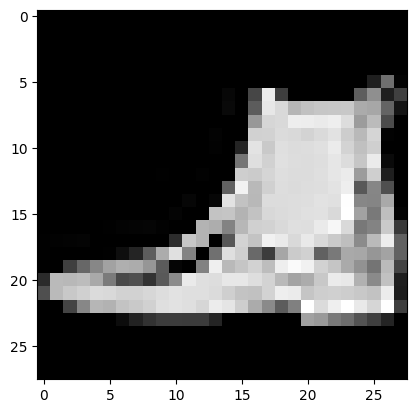

In [14]:
exemplo_n = 5
print(nomes_classes[y_train[exemplo_n]]) # Mostra label do exemplo (bota)
#plt.imshow(X_train[exemplo_n], interpolation='nearest')
plt.imshow(X_train[exemplo_n], cmap='gray', interpolation='nearest')
# Se quisermos ver em Grayscale é preciso do cmap='gray'
plt.show()

#  Rede Neural Artificial com Keras

In [15]:
# Camadas ocorrem uma após a outra de maneira sequencial, chamado de Feedforward
# Para um dataset com imagens simples como esse já deve ser o suficiente
nn = keras.models.Sequential()

# Transforma a Matriz em array de 784 elementos (28 x 28 = 784)
# Necessária antes de camada Dense que não aceita matrizes.
# Obs: essa é não é uma rede convolucional (não tem camadas convolucionais nem pooling) e sim uma rede Multilayer Perceptron (MLP), por isso o flatten.
nn.add(keras.layers.Flatten(input_shape=[28, 28]))

# Camada com 300 neurônios e ativação Relu
# Basicamente se função de ativação der um resultado menor que 0, retorna 0.
# Serve para tentar realizar um aprendizado mais rápido (Neurônios com saída 0 são "desligados", gerando eficiencia) e para aprender padrões complexos
# Evita Gradiente Vanishing (ocorre quando os gradientes se tornam extremamente pequenos durante o backpropagation, paralisando o aprendizado nas camadas iniciais de redes profundas).
nn.add(keras.layers.Dense(300, activation="relu"))

# Desativa aleatoriamente 10% dos neurônios durante o treino (saída = 0) a cada batch (quando há batch)
# Serve para evitar overfitting, a rede não fica dependente de certos neurônios, acaba ficando com pesos mais 'distribuidos'
nn.add(keras.layers.Dropout(rate=0.1))

# Camada com 100 neurônios e ativação Relu
# Pelo que pesquisamos diminuir neurônios progressivamente reduz o custo computacional sem perder desempenho e reduz a chance de overfitting.
nn.add(keras.layers.Dense(100, activation="relu"))

# Desativa aleatoriamente 10% dos neurônios durante o treino (saída = 0) a cada batch
nn.add(keras.layers.Dropout(rate=0.1))

# Camada com 10 neurônios (tem que ser 10 pois cada um representa uma classe) e
# o Softmax gera a probabilidade de ser cada uma das classes, da um resultado de 0 a 1 (somas dos resultados da 1 = 100%).
nn.add(keras.layers.Dense(10, activation="softmax"))

nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

### Compilando e treinando o modelo

In [16]:
%time
nn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# Loss function é definida como sparse_categorical_crossentropy, que penaliza mais quando o modelo erra com alta confiança.

# SGD (Stochastic Gradient Descent) é o otimizador, ou seja, quem ajusta os pesos para minimizar a perda controlando a taxa de aprendizado.
# Cálcula o gradiente, é lento em datasets grandes porém em geral entrega ótimos resultados.

# metrics = accuracy, no contexto de classficiação queremos aquele classifica com maior acurácia, logo essa é nossa métrica de classificação correta para a rede.
history_nn = nn.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6518 - loss: 1.0413 - val_accuracy: 0.8350 - val_loss: 0.5091
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8141 - loss: 0.5398 - val_accuracy: 0.8452 - val_loss: 0.4515
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8336 - loss: 0.4796 - val_accuracy: 0.8582 - val_loss: 0.4125
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8446 - loss: 0.4411 - val_accuracy: 0.8674 - val_loss: 0.3916
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8524 - loss: 0.4174 - val_accuracy: 0.8688 - val_loss: 0.3796


### Visualizar a performance

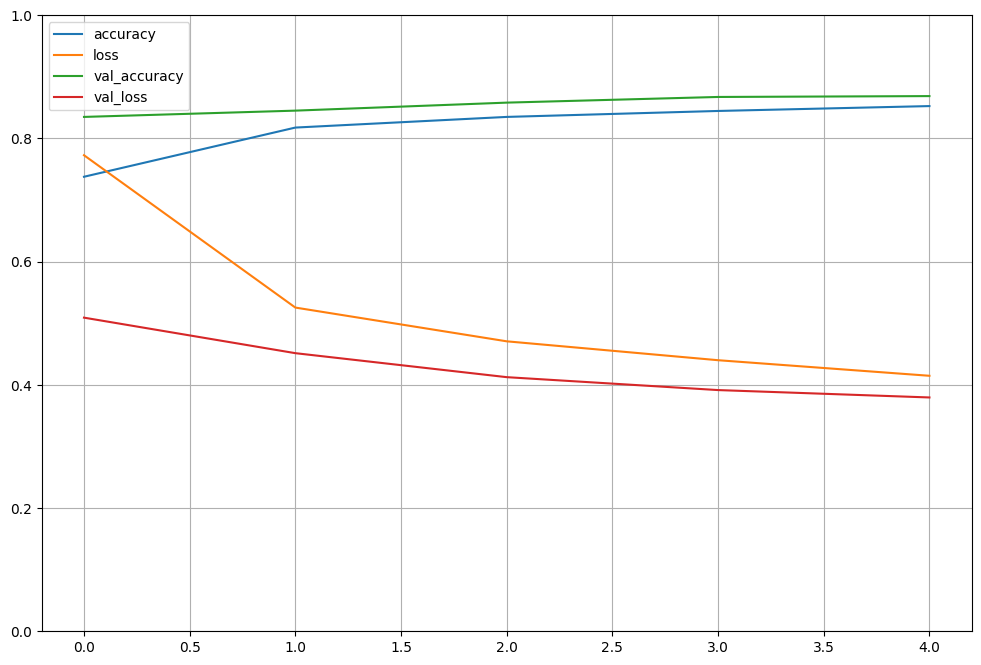

In [17]:
pd.DataFrame(history_nn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Mostra a evolução dos valores ao longo das 5 épocas, começa em menos de 0.8 mas logo passa de 0.8.
# Porém cresce muito pouco depois da segunda época, indicando que sim que o modelo aprendeu gradualmente mas foi estagnando o aprendizado.
# Loss sofre uma queda bem expressiva no início mas sofre do mesmo problema da acurácia.

# accuracy: Acurácia no conjunto de treino.
# loss: Perda (custo) no treino.
# val_accuracy: Acurácia no conjunto de validação.
# val_loss: Perda na validação.

### Avaliar o modelo

In [18]:
# prints the loss and the accuracy
nn.evaluate(X_test, y_test,verbose=1)

# Loss bem alto, porém isso é devido a nossa loss function sparse_categorical_crossentropy,
# que penaliza bastante previsões erradas com confiança alta.
# O modelo classifica corretamente a maioria das amostras mas quando erra tem uma confiança bem alta na classe errada escolhida.

# A acurácia não é satisfatória para um dataset simples como esse, em CNN, quando envolvemos imagens,
# pesquisamos ser comum utilizar mais camadas pois existem sim certos padrões complexos de distinção (peças parecidas) e isso indica que provavelmente precisamos de mais camadas.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8261 - loss: 61.1864


[65.55221557617188, 0.8184000253677368]

###Realizar uma Previsão

In [19]:
X_novo = X_test[:4]
y_proba = nn.predict(X_novo)
y_proba

# Podemos ver que a previsão desses exemplos é sempre 1 indicando 100% de confiança (confiança excessiva).
# Conforme falamos um pouco no bloco anterior

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
y_pred = np.argmax(nn.predict(X_novo), axis=-1)
print(y_pred)
print(np.array(nomes_classes)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[9 2 1 1]
['bota' 'casaco' 'calca' 'calca']


### Verificar os resultados

In [21]:
y_novo = y_test[:4]
print(y_novo)
np.array(nomes_classes)[y_pred]
# Esta certo ao menos

[9 2 1 1]


array(['bota', 'casaco', 'calca', 'calca'], dtype='<U10')

calca


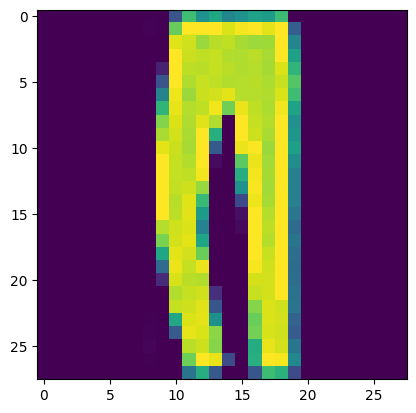

In [24]:
# example_n = 201 - Não entendemos
print(nomes_classes[y_pred[2]])
plt.imshow(X_novo[2], interpolation='nearest')
plt.show()
# Identificado corretamente

# Treinando CNN com Keras

In [9]:
cnn = keras.models.Sequential([

# Definimos a entrada: imagens 28x28 com 1 canal (esse canal representa o grayscale, se fosse RGB seriam 3)
keras.layers.InputLayer(input_shape = (28,28,1)),



# Camada convulucional (agora sim é uma CNN!!) em que definimos o número de filtros que a camada aprenderá como 64,
  ## Cada filtro detecta padrões diferentes (bordas, texturas, etc).
  ## Isso faz que o output dela seja 28x28x64 (64 mapas de características, um por filtro).

 # o segundo parâmetro é o kernel,
  ## definimos a janela da convolução para 5x5 pixels, kernels maiores capturam features(características) maiores e menores capturam features menores

 # padding='same', mantém o tamanho de sáida para o tamanho de entrada. Faz isso ser possível mesmo com a convolução adicionando pixels extra ao redor da imagem (zeros)

 # kernel_initializer='glorot_uniform', kernel_initializer define como os pesos(kernels) de uma camada são inicializados antes do treinamento.
  ## glorot_uniform tenta prevenir vanishing/exploding gradient (pesos se atualizarem muito devagar ou muito rápido), através do controle de variância dos pesos,
  ## esse controle ocorre quando a rede é inicializada com valores aleatórios, no efeito de propagação e no backpropagation.
  ## para pegar o range de pesos desejado, se faz sqrt(2 / (fan_in + fan_out)), baseado na documentação https://keras.io/api/layers/initializers/
  ## fan_in = kernel_height * kernel_width * input_channels e fan_out = kernel_height * kernel_width * output_channels
  ## fan_in = 5 * 5 * 1 = 25 e fan_out = 5 * 5 * 64 = 1600. Range = 0.035+-
keras.layers.Conv2D(64,5, activation='relu', padding='same', kernel_initializer='glorot_uniform'),

# Esta é uma camada de pooling máximo 2D, que reduz a dimensionalidade espacial da saída da convolução, tentando preservar as características mais importantes da convolução.
  ## Isso funciona pois, se um neurônio ativou fortemente em uma região, é porque detectou um padrão relevante (ex: uma borda ou textura)
  ## Gera um ganho de eficiência computacional absurdo e reduz a sensibilidade a ruídos

  ## O 2 passado se refere ao pool_size, que é o tamanho da janela de pooling (2x2 pixels). A janela passa pela imagem pegando o valor máximo em cada região.

  ## Há 2 parâmetros não especificados, strides, que tem como valor padrão pool_size e padding, que tem como valor padrão valid
  ## strides=pool_size é o passo (distância) de cada delizamento da janela deslizante, com pool_size as janelas não se sobrepoem e gera grande redução dimensional
  ## padding=valid, como o padding explicado na camada convulucional acima, porém o valid faz com que a imagem não seja preenchida com zeros para preservar sua dimensionalidade (o que no pooling é o que queremos)
keras.layers.MaxPool2D(2),



# As 2 camadas convolucionais possuem 128 filtros com uma janela de 3x3 cada uma.
# Conforme avançamos na CNN estamos tentando pegar caracteristicas/formas mais complexas (pequenos conjuntos de pixels específicos diferentes em cada tipo de calça etc).
# O motivo de termos 2 camadas convolucionais seguidas seria pois a primeira camada detecta características simples (bordas, cores),
# e a segunda combina essas características em padrões mais complexos (como formas geométricas)
  # Exemplo prático em nosso contexto:
  ## Primeira Conv2D:Detecta bordas verticais/horizontais do tecido.
  ## Segunda Conv2D: Combina bordas para reconhecer padrões de zíper ou bolsos.
  ## MaxPool2D: Preserva apenas as regiões onde os padrões são mais fortes (ex.: zíper central).

# Continuamos con activation relu e como o kernel_initializer não é especificado, é utilizado por padrão o glorot_uniform (conforme documentação https://keras.io/api/layers/convolution_layers/convolution2d/)
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
keras.layers.Conv2D(128,3, activation='relu', padding='same'),
keras.layers.MaxPool2D(2), # Reduzimos ainda mais a dimensionalidade com o max pooling novamente



# Conforme aprofundamos mais a rede e diminuimos já 2 vezes a dimensionalidade com 2 max pooling,
# podemos aumentar ainda mais a quantidade de filtros sem prejudicar muito a performance da rede (são 258 filtro de 3x3 pixels).

# Mesmo princípio do 'bloco' anterior a fim de filtrar caracteristicas ainda mais especificas, porém com maior quantidade de filtros
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
keras.layers.Conv2D(258,3, activation='relu', padding='same'),
keras.layers.MaxPool2D(2),



# Nesse ponto passamos a usar uma RNA, que só aceita vetores, então fazemos o flatten que converte de 3x3x258 = 2322
keras.layers.Flatten(),

# Após extrairmos as caracteristicas com as camadas convolucionas, basicamente usamos uma RNA para aprender suas relações e classificar elas dentre as 10 classes.
# Utilizamos a rede densa semelhante a anterior para isso

# O que mudamos aqui é o dropout que agora é de metade dos neurônios, pois antes a rede estava com muita confinça nas predições
# Conforme explicamos antes, ele serve para evitar overfitting, a rede não fica dependente de certos neurônios, acaba ficando com pesos mais 'distribuidos'

# Camada com 128 neurônios e ativação Relu já explicada
keras.layers.Dense(128, activation="relu"),
keras.layers.Dropout(rate=0.5),
# Camada com 64 neurônios e ativação Relu já explicada
keras.layers.Dense(64, activation="relu"),
keras.layers.Dropout(rate=0.5),

# Saida com a mesma lógica da rede anterior
keras.layers.Dense(10, activation="softmax")])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 258)      │       297,474 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 258)      │       599,334 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 258)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2322)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       297,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,426,162 (5.44 MB)

 Trainable params: 1,426,162 (5.44 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
print(X_train.shape)
X_train_new = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_valid_new = X_valid.reshape(X_valid.shape[0], X_valid.shape[1], X_valid.shape[2],1)
X_test_new = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train_new.shape)

(55000, 28, 28)
(55000, 28, 28, 1)


In [13]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# Mesmos parametros
history_cnn = cnn.fit(X_train_new, y_train, epochs=20, validation_data=(X_valid_new, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 673s 391ms/step - accuracy: 0.3296 - loss: 1.8275 - val_accuracy: 0.7624 - val_loss: 0.6783
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 671s 385ms/step - accuracy: 0.6794 - loss: 0.8626 - val_accuracy: 0.7924 - val_loss: 0.5738
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 698s 394ms/step - accuracy: 0.7451 - loss: 0.6995 - val_accuracy: 0.8234 - val_loss: 0.4592
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 687s 397ms/step - accuracy: 0.7830 - loss: 0.6011 - val_accuracy: 0.8426 - val_loss: 0.4412
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 667s 388ms/step - accuracy: 0.8067 - loss: 0.5516 - val_accuracy: 0.8592 - val_loss: 0.3975
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 663s 386ms/step - accuracy: 0.8162 - loss: 0.5197 - val_accuracy: 0.8668 - val_loss: 0.3794
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 685s 388ms/step - accuracy: 0.8312 - loss: 0.4855 - val_accuracy: 0.8688 - val_loss: 0.3554
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 683s 388ms/step - ac

### Avaliar o modelo

In [14]:
cnn.evaluate(X_test_new, y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8700 - loss: 32.4271


[33.380367279052734, 0.8690000176429749]

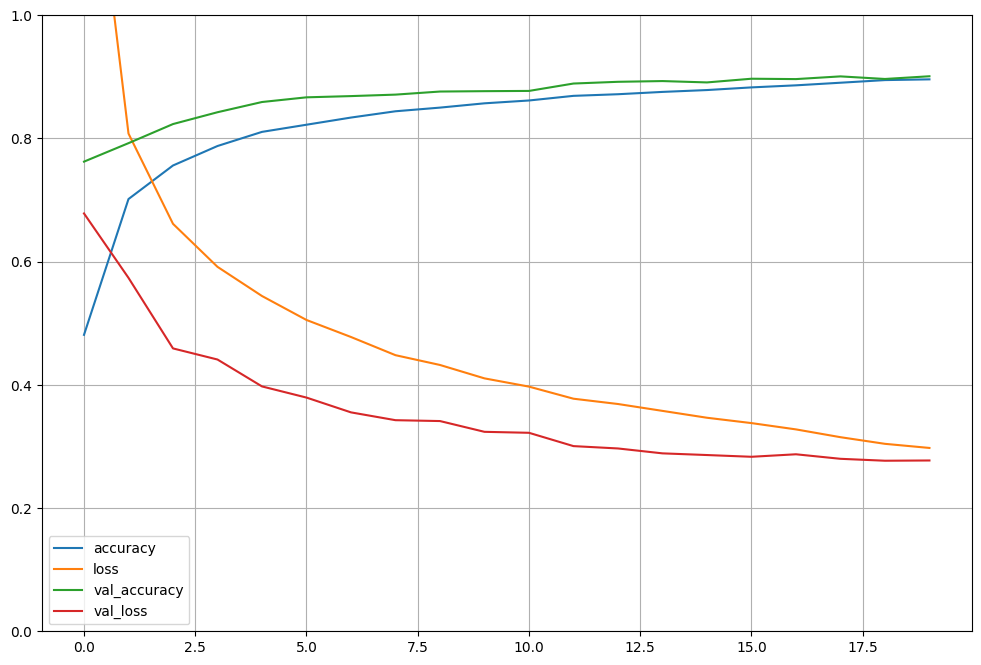

In [15]:
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


# Conseguimos diminuir bastante nossa loss (de mais de 60 para 30), logo a confiança de que o modelo está certo quando ele está errado diminuiu.
# Dar essa confiança mais baixa ao errar deixa noss rede mais confiável.

# Nossa acurácia está melhor que o modelo de RNA, com 87% de acurácia e cremos haver bem menos overfitting também devido val_accuracy até maior que o accuracy.
# Devido a nossa aprendizagem de características menores (detalhes).

# Notamos uma certa estaganação no final do gráfico, logo mais treino (épocas) não deve melhorar significativamente a acurácia do modelo,
# mas talvez melhore um pouco mais o loss, que teve uma melhora gradativa e não parece ter estagnado totalmente ainda (últimas epocas tiverem melhora significativa ainda).


# Hipóteses de melhora:
  # Adicionar BatchNormalization() após camadas de convolução, para conseguirmos usar learning rates maiores minimizando os seus maleficios (como pular o minimo global).
    ## O que acreditamos poder melhorar acurácia um pouco (1-4%) e acelerar bastante seu treinamento.
  # Além disso adicionar mais épocas e testar mudar o otimizador AdamW (para treinar mais rápido que o SGD).

  # Data Augmentation seria outra coisa que possivelmente ajudaria muito. Consiste em aplicar transformações aleatórias nas imagens de treinamento, como rotações, translações, flips horizontais ou até zoom. Isso aumenta a diversidade do conjunto de dados e ajuda o modelo a generalizar melhor e extrair as caracteristicas realmente importantes.
  # Isso teoricamente reduziria o overfitting e pode melhorar a acurácia no conjunto de teste, especialmente porque o Fashion-MNIST é relativamente simples e pode se beneficiar de variações artificiais.

  # Também é possível testar adicionar novas camadas com filtros convolucionais de janelas de tamanho diferentes e quantidades diferentes de filtros

  # Implementar GridSearch para buscar os melhores parâmetros para esse problema de forma automática (apenas passamos a lista dos que queremos testar